In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
data = pd.read_csv('backtest_data.csv')

Trade 1, Profit: -2857.142857142858
Trade 3, Profit: -3571.428571428571
Trade 5, Profit: 1190.4761904761913
Trade 7, Profit: -2380.952380952381
Trade 9, Profit: 85.0340136054424
Trade 13, Profit: 270.2450843351039
Trade 15, Profit: -37.67616494172671
Trade 17, Profit: -674.6388284878003
Trade 19, Profit: 19.380869217843838
Trade 21, Profit: 1970.3224491569142
Trade 23, Profit: -1023.0795578410994
Trade 25, Profit: 437.64003599956914
Trade 27, Profit: -797.6459071972354
Trade 29, Profit: -117.56578211393935
Trade 31, Profit: 30.64595844738369
Trade 33, Profit: -346.85652969993225
Trade 35, Profit: -527.2219251438971
Trade 37, Profit: 556.5120320963358
Trade 39, Profit: -308.2220485456628
Trade 41, Profit: 140.6899440809034
Trade 43, Profit: -606.7205123134352
Trade 45, Profit: -219.13894514824892
Trade 47, Profit: 217.5276293751001
Trade 49, Profit: -390.43420657069237
Trade 51, Profit: 26.329192279833478
Trade 53, Profit: -217.21583630862835
Trade 55, Profit: -120.6754646159045
Trade 5

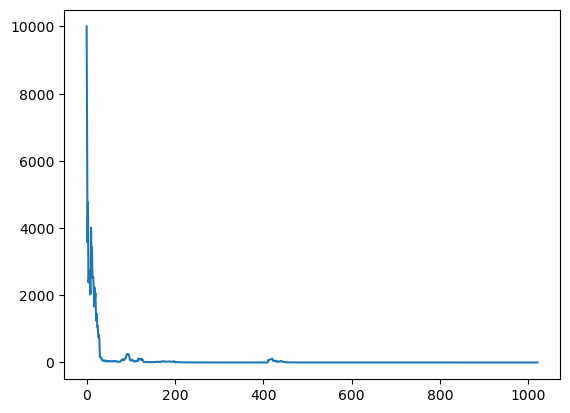

In [3]:
balance = 10000
balance_points = [10000]

for index, row in data.iterrows():
    if row['call_buy'] == True:
        buy_price = row['call_prices']
        sell_price = data.at[(index+1, 'call_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
            new_balance = balance * ((p_l/buy_price) + 1)
        elif p_l < 0:
            new_balance = balance * (1 - ((buy_price - sell_price)/buy_price))
        else:
            continue

    
    elif row['put_buy'] == True:
        buy_price = row['put_prices']
        sell_price = data.at[(index+1, 'put_prices')]
        p_l = sell_price - buy_price

        if p_l > 0:
           new_balance = balance * ((p_l/buy_price) + 1)
        elif p_l < 0:
            new_balance = balance * (1 - ((buy_price - sell_price)/buy_price))
        else:
            continue
        
    else:
        continue
    
    print(f'Trade {index+1}, Profit: {new_balance - balance}')
    balance = new_balance
    balance_points.append(balance)

plot.plot(balance_points)
percent_gain = round(((balance - 10000) / 10000) * 100, 2)
print(f'Gain: {percent_gain}%')

Overall Unnsuccesful trading startegy. While I beleive that it could work. Having to supplement missing data with data from a minute later ultimately defeats the point of the stretgy. More testing possibly but would need subscription to polygon.io. 8 hour runtime for reteriebing options data